# Movie Recommender System

## Dataset: [MovieLens 100k Dataset](https://grouplens.org/datasets/movielens/100k/)


### Import all the necessary header files as follows:

**pandas** : An open source library used for data manipulation, cleaning, analysis and visualization. <br/>
**numpy** : A library used to manipulate multi-dimensional data in the 	form of numpy arrays with useful in-built functions. <br/>
**graphlab** : A library created by Turi allowing the users to design applications by providing many algorithms. <br/>
**Ipython** : A library used to open external files of supported format to be embedded in the Jupyter Notebook.	<br/>
**matplotlib** : A library used for plotting and visualization of data. <br/>
**seaborn** : A library based on matplotlib which is used for plotting of data.

In [1]:
# Importing the header files
import pandas as pd
import graphlab
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

### Read the data from the movielens dataset using the read_csv() function from the pandas library.

In [2]:
# Reading users file
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep = '|', names = user_cols, encoding='latin-1')

In [3]:
# Reading ratings file
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep = '\t', names = rating_cols, encoding='latin-1')

In [4]:
# Reading items file
item_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep = '|', names = item_cols, encoding='latin-1')

### Inspecting and cleaning the data

In [5]:
print "Number of users:", users.shape[0]
users.head()

Number of users: 943


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
print "Number of ratings:", ratings.shape[0]
ratings.head()

Number of ratings: 100000


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
print "Number of items:", items.shape[0]
items.head()

Number of items: 1682


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
ratings.rating.describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [9]:
ratings.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

### Data Visualization

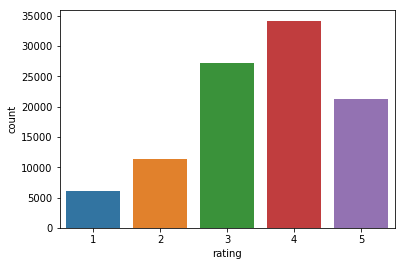

In [10]:
sns.countplot(x=ratings.rating,data=ratings)

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

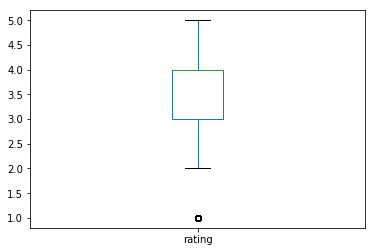

In [11]:
ratings['rating'].plot(kind='box', subplots=True)

Text(0.5,0,'Age')

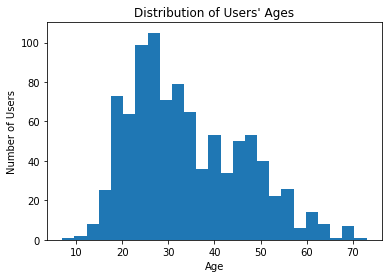

In [12]:
users.age.plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age')

#### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [13]:
# Splitting dataset into training set and test set
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
train = pd.read_csv('ml-100k/ua.base', sep='\t', names=rating_cols, encoding='latin-1')
test = pd.read_csv('ml-100k/ua.test', sep='\t', names=rating_cols, encoding='latin-1')
print "Dimensions of training set:", train.shape 
print "Dimensions of test set:", test.shape

Dimensions of training set: (90570, 4)
Dimensions of test set: (9430, 4)


In [14]:
train_data = graphlab.SFrame(train)
test_data = graphlab.SFrame(test)

This non-commercial license of GraphLab Create for academic use is assigned to shreayan_sameer@srmuniv.edu.in and will expire on February 07, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\shrea\AppData\Local\Temp\graphlab_server_1549553895.log.0


## Simple Popularity Model (recommendations based on popular choices)

##### Creating an object of the simple popularity model from the graphlab library on the training set. Simple popularity method is an algorithm that will make recommendations based on its popularity or ratings given to that object from various users. It is based completely upon the object ratings.

In [15]:
# Simple Popularity Model (recommendations based on popular choices)
pop_model = graphlab.popularity_recommender.create(train_data, user_id = 'user_id', item_id = 'movie_id', target = 'rating')

Recsys training: model = popularity

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.220037s

90570 observations to process; with 1680 unique items.

In [16]:
# Getting recommendations for the first 5 users
pop_recommend = pop_model.recommend(users = range(1,6),k = 5)
pop_recommend.print_rows(num_rows = 25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1599   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1599   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1599   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1599   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1599   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

## Collaborative Filtering Model (recommendations based on personalized choices)

##### Creating an object of the collaborative filtering model from the graphlab library on the training set. Collaborative filtering algorithm is a personalized algorithm which takes in account what movies users watch after a particular movie which is generally of the same genre. 	The collaborative filtering algorithm predicts what a user likes based 	on what other similar users like. It is one of the most popular recommender system algorithm.

In [17]:
# Collaborative Filtering Model
col_filter_model = graphlab.item_similarity_recommender.create(train_data, user_id  ='user_id', item_id = 'movie_id', target = 'rating', similarity_type = 'pearson')

Recsys training: model = item_similarity

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.120024s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 50.402ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 89.845ms                            | 0.25             | 6               |

| 653.265ms                           | 100              | 1680            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

In [18]:
# Making recommendations
col_filter_recommend = col_filter_model.recommend(users = range(1,6), k = 5)
col_filter_recommend.print_rows(num_rows = 25)

Generating candidate set for working with new users.

Finished training in 1.67302s

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1467   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1467   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1467   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1467   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1467   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

### Evaluation of Models

In [19]:
# Calculating Accuracy of Predictions
model_performance = graphlab.compare(test_data, [pop_model, col_filter_model])
graphlab.show_comparison(model_performance,[pop_model, col_filter_model])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    |        0.0        |        0.0        |
|   4    |        0.0        |        0.0        |
|   5    |        0.0        |        0.0        |
|   6    |        0.0        |        0.0        |
|   7    |        0.0        |        0.0        |
|   8    | 0.000265111346766 | 0.000212089077413 |
|   9    | 0.000235654530458 | 0.000212089077413 |
|   10   | 0.000212089077413 | 0.000212089077413 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--

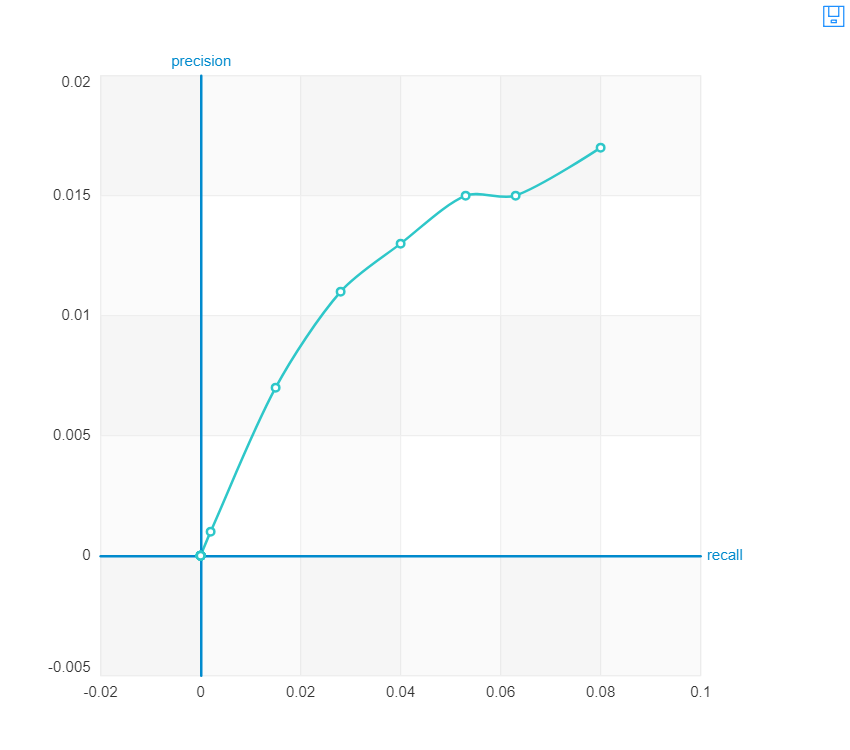

In [20]:
Image("model.png")

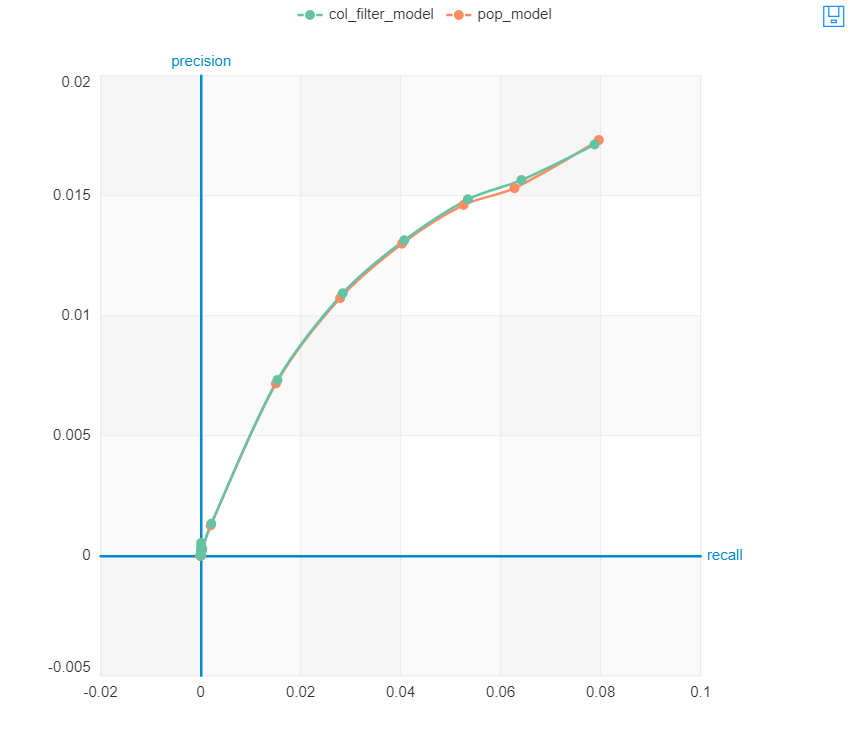

In [21]:
Image("line_recall_precision.png")